In [1]:
using Plots,LinearAlgebra

In [2]:
using Observables

# Proyecto Final-Trompo que gira sobre su eje

#### Física Computacional. Grupo 8266.

#### Facultad de Ciencias. Universidad Nacional Autónoma de México

 En este codigo desarrollamos una simulación de un trompo usando las técnicas vistas en clase y librerías de Julia

In [3]:
# Derivada parcial aproximada por diferencia central para f=f(x1,...,xn) 
function ∂xj(f,x0,ind,h=1e-5)
    # Para funciones escalares
    if length(x0) == 1
        return (f(x0+h)-f(x0-h))/2h
    # Para funciones vectoriales  
    else
        H = zeros(length(x0))
        H[ind] = h
        return (f(x0+H)-f(x0-H))/2h
    end
    
end
    
# Jacobiano
function J(F,x)
    # F(x)=(f1(x1,..,xn),..,fn(x1,..,xn))
    n = length(x)
    J = zeros(n,n)
    for j in 1:n
        J[:,j] = ∂xj(F,x,j)
    end
    return J
end

# Newton-Raphson
function NewtonRaph(f,x_inicial,ε=1e-7)
    iter = 1000
    l = length(x_inicial)
    i = 2
    # Para funciones escalares
    if l == 1
        X = zeros(iter)
        X[1] = x_inicial
        while abs(f(X[i-1]))>ε
            (i>=iter) && break   # Máximo iter iteraciones
            X[i] = X[i-1] - f(X[i-1])/∂xj(f,X[i-1],1,1e-6)
            i += 1
        end
        return X[i-1]
    # Para funciones vectoriales    
    else 
        X = zeros(iter, l)
        X[1,:] = x_inicial
        while norm(f(X[i-1,:]))>ε 
            (i>=iter) && break   # Máximo iter iteraciones
            X[i,:] = X[i-1,:] - inv(J(f,X[i-1,:]))*f(X[i-1,:])
            i += 1
        end
        return X[i-1,:]
    
    end
end

NewtonRaph (generic function with 2 methods)

El Jacobiano funciona bien

In [4]:
Ejem(X) = [2*X[1]^2 + 3*X[2] + 4*X[3] + 3, X[1]+2*X[2]^3+3*X[3]+1, 4*X[1] + 5*X[2]+ 6*X[3]^2 + 2]
J(Ejem,[4, 6, 3])

3×3 Array{Float64,2}:
 16.0    3.0   4.0
  1.0  216.0   3.0
  4.0    5.0  36.0

La función Newton Raphson también funciona bien

In [5]:
Ejem2(X) = [2*X[1]+X[2]-10, -1*X[1]+2*X[2]-5]
a = NewtonRaph(Ejem2,[1,2])
println(a)
Ejem2(a)

[3.000000000022425, 4.000000000004661]


2-element Array{Float64,1}:
  4.951061782776378e-11
 -1.3102408047416247e-11

In [6]:
Ejem3(x) = tan(x)-sqrt(x)
b = NewtonRaph(Ejem3,0.7)
println(b)
Ejem3(b)

0.6948992895568646


2.413244604149156e-9

In [7]:
# Algoritmo de Crank-Nicholson (o regla trapezoidal) 
function Crank_Nicholson(f,x0,t0,tf,h)
    # h -> tamaño de paso
    # f = dx/dt que no depende explícitamente del tiempo
    T = range(t0,stop = tf, step = h)
    N = length(T)
    l = length(x0)
    
    # Implementar regla del trapecio
    # Para funciones escalares
    if l==1 
        X = zeros(N)
        X[1] = x0
        for i in 2:N
            k1 = X[i-1]
            aux(z) = k1 + (h/2)*(f(k1)+f(z))-z
            k2 = NewtonRaph(aux,k1)
            X[i] = X[i-1] + (h/2)*(f(k1) + f(k2))
        end
        return T,X
    # Para funciones vectoriales  
    else
        X = zeros(N,l)
        X[1,:] = x0
        for i in 2:N
            k1 = X[i-1,:]
            aux(z) = k1 + (h/2)*(f(k1)+f(z))-z
            k2 = NewtonRaph(aux,k1)
            X[i,:] = X[i-1,:] + (h/2)*(f(k1) + f(k2))
        end
        return T,X
    end
end

Crank_Nicholson (generic function with 1 method)

Probamos el algoritmo 

In [8]:
Ejem4(x) = 1/x
x_0 = 1
t_0 = 0
t_f = 10
h = 1e-3
tiempos, xs = Crank_Nicholson(Ejem4,x_0,t_0,t_f,h)

(0.0:0.001:10.0, [1.0, 1.0009995007488768, 1.0019980044875387, 1.0029955141936278, 1.0039920328299934, 1.0049875633447956, 1.0059821086716068, 1.0069756717295124, 1.0079682554232112, 1.008959862643114  …  4.58061133891643, 4.580829645185565, 4.581047941051485, 4.581266226515676, 4.581484501579626, 4.581702766244822, 4.581921020512749, 4.582139264384893, 4.5823574978627395, 4.582575720947773])

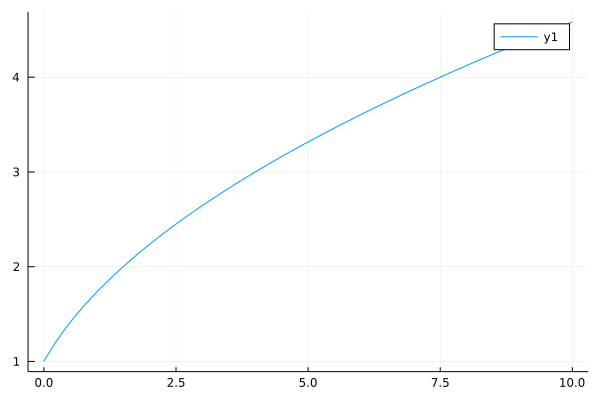

In [9]:
plot(tiempos,xs)

In [10]:
function penduloSimple(Theta)
        # Theta es un vector cuya primera entrada es el ángulo theta y la segunda es la velocidad en theta
        # La funcion regresa la derivada de theta y de la derivada de la velocidad
    return [Theta[2],-(9.8/l)*sin(Theta[1])]
end

penduloSimple (generic function with 1 method)

In [11]:
l = 10
x_0 = [pi/0.99,0.0]
t_0 = 0
t_f = 30
h = 1e-1
tiempos, xs = Crank_Nicholson(penduloSimple,x_0,t_0,t_f,h)

(0.0:0.1:30.0, [3.1733259127169626 0.0; 3.1734817612277197 0.003116970196234473; … ; 8.86357617496225 0.5473648524054664; 8.915814944011641 0.4974105285823999])

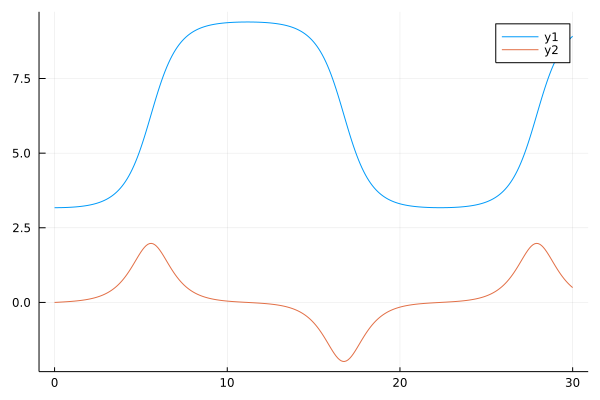

In [12]:
plot(tiempos,xs)

El algoritmo funciona bien

Ahora definimos las ecuaciones que nos interesan
$$
\dot{\theta}= \sqrt{\frac{2}{I_1}(E'-V)}
$$
$$
\dot{\varphi} = \frac{p_\varphi - p_\psi \cos{\theta}}{I_1 \sin^2{\theta}}
$$
$$
\dot{\psi} = \frac{p_\psi}{I_3} - \frac{(p_\varphi - p_\psi \cos{\theta}) \cos{\theta}}{I_1 \sin^2{\theta}}
$$
$$
V(\theta) \equiv \frac{(p_\varphi - p_\psi \cos{\theta})^2}{2 I_1 \sin^2{\theta} } + Mgh \cos{\theta}
$$
Notamos que el sistema ya es de primer orden

In [20]:
# Variables libres: M, g, h, pψ, pφ, I1, I3, E'
function dθ(θ)
    # ft función de θ
    V = (pϕ - pψ*cos(θ))^2/(2*I1*(sin(θ))^2) + M*g*h*cos(θ)
    return (sqrt(2/I1)*(E-V))
end

function dϕ(ft)
    return (pϕ - pψ*cos(θ))/(I1 * (sin(θ))^2)
end

function dψ(ft)
    return (pψ)/(I3) - (pϕ - pψ* cos(θ))*cos(θ)/(I1*(sin(θ))^2)
end


dψ (generic function with 1 method)

In [29]:
E = 15
M = 0.2
g = 9.8
h = 0.1
pϕ = 8
pψ = 8
I1 = 4
I3 = 5
θ_0 = 0.01*π
t_0 = 0
t_f = 0.5
h = 1e-2
tθ,xθ = Crank_Nicholson(dθ,θ_0,t_0,t_f,h);

In [30]:
E = 20
tθ2,xθ2 = Crank_Nicholson(dθ,θ_0,t_0,t_f,h);

In [31]:
E = 10
tθ3,xθ3 = Crank_Nicholson(dθ,θ_0,t_0,t_f,h);

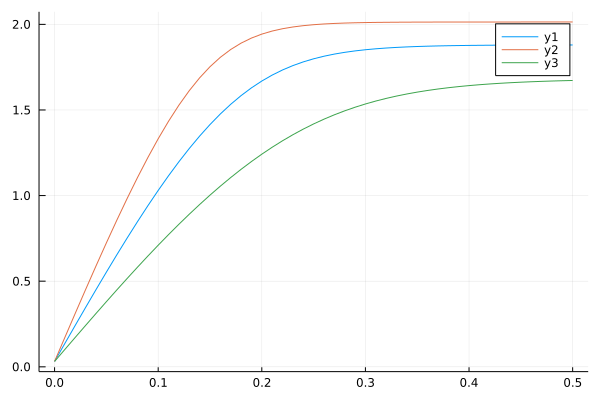

In [32]:
plot(tθ,xθ)
plot!(tθ2,xθ2)
plot!(tθ3,xθ3)

In [38]:
function RK4(f,x0,t0,tf,h)
    tt = range(t0,stop = tf, step = h)
    N = length(tt)
    l = length(x0)
    
    
    if l == 1
        xx = zeros(N)
        xx[1] = x0
        for i in 2:N
            k1 = f(xx[i-1])
            k2 = f(xx[i-1]+(h/2)*k1)
            k3 = f(xx[i-1]+(h/2)*k2)
            k4 = f(xx[i-1]+h*k3)

            xx[i] = xx[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
        end
        return tt,xx
        
    else
        xx = zeros(N,l)
        xx[1,:] = x0
        for i in 2:N
            k1 = f(xx[i-1,:])
            k2 = f(xx[i-1,:]+(h/2)*k1)
            k3 = f(xx[i-1,:]+(h/2)*k2)
            k4 = f(xx[i-1,:]+h*k3)

            xx[i,:] = xx[i-1,:]+(h/6)*(k1+2*k2+2*k3+k4)
        end
        return tt,xx
    end
    
    
end

RK4 (generic function with 1 method)

In [39]:
tθ4,xθ4 = RK4(dθ,θ_0,t_0,t_f,h)

(0.0:0.01:0.5, [0.031415926535897934, 0.10191953856635522, 0.17222038754948343, 0.24217772589413497, 0.3116501592261132, 0.3804954654179131, 0.4485705005927645, 0.5157312197130224, 0.5818328404976761, 0.6467301800136409  …  1.647484696060269, 1.651948056733262, 1.6558541132637938, 1.659268702764885, 1.6622507722235713, 1.6648528866947756, 1.6671217545480614, 1.6690987515745894, 1.6708204306124632, 1.6723190073882683])

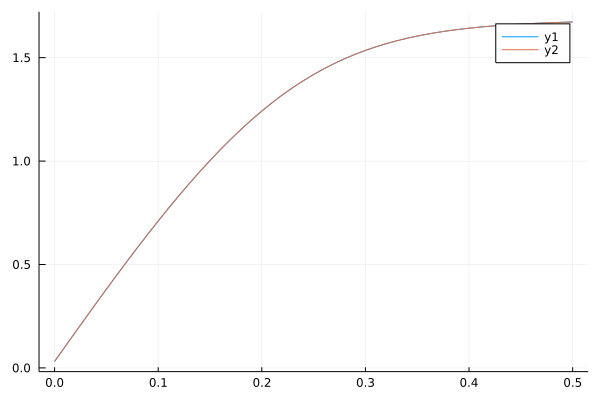

In [41]:
plot(tθ3,xθ3)
plot!(tθ4,xθ4)